In [ ]:
import pandas as pd
import numpy as np
import sklearn

# File read

In [ ]:
data = pd.read_csv('/content/wine.csv')
data.head(7)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad



# No missing value

In [ ]:
data.shape
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Encoding categorical features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [ ]:
data['quality'].unique()

array(['bad', 'good'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['quality_enc'] = enc.fit_transform(data['quality'])
print(data[['quality', 'quality_enc']].head(10))

  quality  quality_enc
0     bad            0
1     bad            0
2     bad            0
3    good            1
4     bad            0
5     bad            0
6     bad            0
7    good            1
8    good            1
9     bad            0


# Spliting the dataset into features and labels

In [ ]:
from sklearn.model_selection import train_test_split
feature = data.drop(columns='quality', axis = 1)
lebel = data['quality']

In [ ]:
print(feature)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
print(lebel)

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: quality, Length: 1599, dtype: object


In [ ]:
 feature_train,feature_test, lebel_train, lebel_test = train_test_split(feature, lebel, test_size=0.2, random_state=2)
 print(feature.shape, feature_test.shape, feature_train.shape )

(1599, 12) (320, 12) (1279, 12)


# Scaling all the values between 0-1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(feature_train)
feature_train_scaled = scaler.transform(feature_train)
print("per-feature minimum before scaling:\n {}".format(feature_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(feature_train.max(axis=0)))


per-feature minimum before scaling:
 fixed acidity           4.70000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality_enc             0.00000
dtype: float64
per-feature maximum before scaling:
 fixed acidity            15.60000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    278.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.00000
quality_enc               1.00000
dtype: float64


In [ ]:
print("per-feature minimum after scaling:\n {}".format(feature_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(feature_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(feature_train, lebel_train) #Training the model
predictions = model.predict(feature_test)
print(predictions)# printing predictions

['good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad'
 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad'
 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good'
 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print( accuracy_score(lebel_test, predictions))

1.0


# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(feature_train,lebel_train)
y_pred = clf.predict(feature_test)
score=accuracy_score(y_pred,lebel_test)
print(score)

1.0


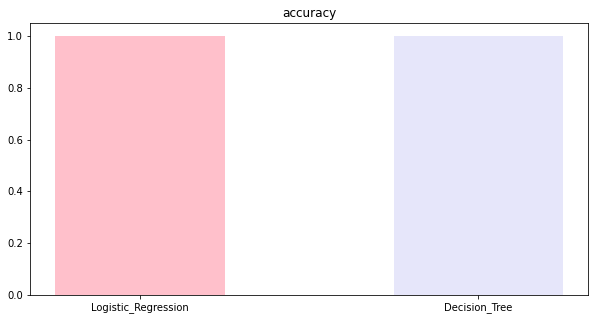

In [ ]:
import matplotlib.pyplot as plt
# Dataset generation
x1 = 'Logistic_Regression'
y1 = 1
x2 = 'Decision_Tree'
y2 = 1
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(x1, y1, color ='pink', width = 0.5)
plt.bar(x2, y2, color ='lavender', width = 0.5)
plt.title("accuracy")
plt.show()


In [ ]:
 x_train, x_test, y_train, y_test = feature_train, feature_test, lebel_train, lebel_test

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
svc1 = svc.score(x_test, y_test)

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 1.00
Testing accuracy of the model is 1.00


In [ ]:
predictions = svc.predict(x_test)
print(predictions)

['good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad'
 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad'
 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good'
 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[132   0]
 [  0 188]]


# Neural Network (MLPClassifier)

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
nnc1 = nnc.score(x_test, y_test)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


In [ ]:
predictions = nnc.predict(x_test)
print(predictions)

['good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'good'
 'good' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad'
 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad'
 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good'
 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[132   0]
 [  0 188]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
rfc1 = rfc.score(x_test, y_test)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))


The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


In [ ]:
predictions = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[132   0]
 [  0 188]]


# Dimensionality reduction using PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

In [ ]:
principal_components= pca.fit_transform(feature)
print(principal_components)

[[-13.22304059  -2.02911102  -1.14279289  -0.42129554  -1.17018428
    0.28579379]
 [ 22.03938034   4.4039953   -0.32384416  -0.21782753  -0.65166121
    0.38434937]
 [  7.1644243   -2.50598105  -0.59486742  -0.23606795  -0.64177173
    0.35295161]
 ...
 [ -3.43291174  14.27474032  -1.74187128   0.18813856   0.31432898
   -0.30926257]
 [  1.13463282  16.31067418  -2.15163308  -0.25525123  -0.63911515
    0.48180263]
 [ -3.87591444   3.13028968  -1.86178478   1.7156953    0.18970709
   -0.43158878]]


In [ ]:
pca.explained_variance_ratio_

array([9.46390841e-01, 4.83621730e-02, 2.59000163e-03, 1.51969304e-03,
       9.11861358e-04, 1.55056008e-04])

In [ ]:
principal_df = pd.DataFrame(data=principal_components, columns=["principle component 1", "principle component 2", "principle component 3", "principle component 4", "principle component 5", "principle component 6"])
#principal_df.head()
main_df=pd.concat([principal_df, data[['quality']]], axis=1)

In [ ]:
main_df.head()

,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,principle component 6,quality
0,-13.223041,-2.029111,-1.142793,-0.421296,-1.170184,0.285794,bad
1,22.039380,4.403995,-0.323844,-0.217828,-0.651661,0.384349,bad
2,7.164424,-2.505981,-0.594867,-0.236068,-0.641772,0.352952,bad
3,13.428436,-1.946403,2.644524,-1.562799,0.058095,-0.513832,good
4,-13.223041,-2.029111,-1.142793,-0.421296,-1.170184,0.285794,bad


In [ ]:
PCA_x = main_df.drop('quality',axis=1)
PCA_y = main_df[['quality']]
x_train, x_test, y_train, y_test= train_test_split(PCA_x, PCA_y, stratify=PCA_y, test_size=0.2)

# Support Vector Machine on reduce dataset

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
svc2 = svc.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 1.00
Testing accuracy of the model is 1.00


In [ ]:
predictions = svc.predict(x_test)
print(predictions)

['bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good'
 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good'
 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'go

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[149   0]
 [  0 171]]


# Neural Network (MLPClassifier) on reduce dataset

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [ ]:
nnc.fit(x_train, y_train)
nnc2 = nnc.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


In [ ]:
predictions = nnc.predict(x_test)
print(predictions)

['bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'bad' 'bad' 'bad' 'good'
 'good' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad'
 'bad' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad'
 'good' 'good' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good'
 'bad' 'bad' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'good' 'good'
 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad' 'good' 'good' 'good'
 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'bad'
 'good' 'bad' 'good' 'good' 'bad' 'good' 'good' 'bad' 'bad' 'good' 'bad'
 'good' 'good' 'good' 'good' 'bad' 'good' 'bad' 'go

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[149   0]
 [  0 171]]


# Ensemble Classifier (Random Forest) on reduce dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
rfc2 = rfc.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))


The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


In [ ]:
predictions = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[149   0]
 [  0 171]]


# Bar chart on pre-PCA and post-PCA results

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
accuracy = [svc1, nnc1, rfc1]
accuracyPCA = [svc2, nnc2, rfc2]

Text(0, 0.5, 'Accuracy')

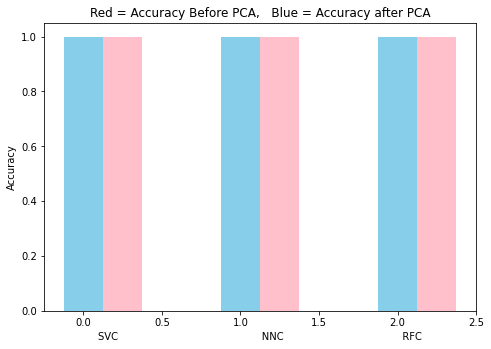

In [ ]:
data = [accuracy, accuracyPCA]
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'skyblue', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'pink', width = 0.25)
ax.set_title('Red = Accuracy Before PCA,   Blue = Accuracy after PCA')
ax.set_xlabel('SVC                                              NNC                                      RFC')
ax.set_ylabel('Accuracy')